In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import matplotlib
import matplotlib.pylab as plt
import numpy as np
from numpy.random import multivariate_normal as mvn


plt.rcParams['figure.figsize'] = (6.0, 6.0)
np.random.seed(42)

from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
from matplotlib import rc
rc('animation', html='jshtml')
font = {'size'   : 22}

matplotlib.rc('font', **font)

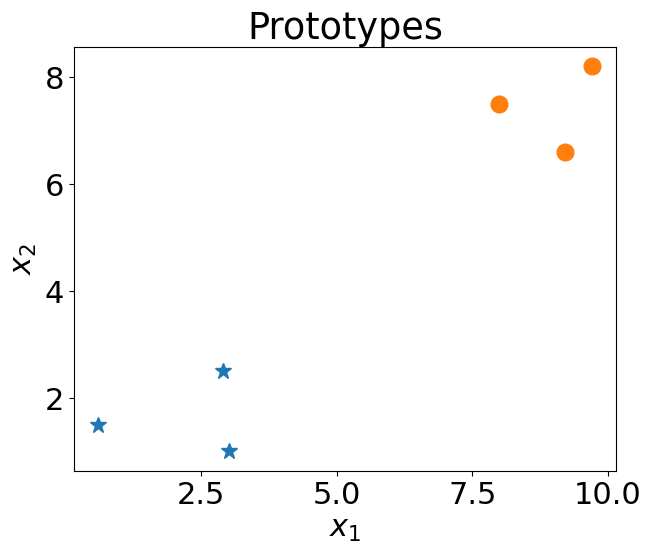

In [65]:
x = np.array([0.6, 2.9, 3])
x2 = np.array([8, 9.2, 9.7])
y = np.array([1.5, 2.5, 1])
y2 = np.array([7.5, 6.6, 8.2])

plt.figure(figsize=(7, 5.5))
plt.plot(x,y, '*', markersize=12)
plt.plot(x2, y2, 'o', markersize=12)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Prototypes')
plt.savefig('../src/images/prototypes_0.eps')

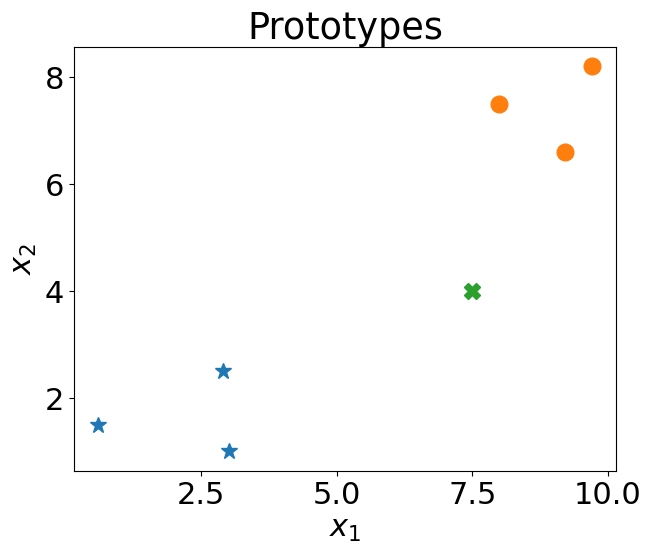

In [66]:
x = np.array([0.6, 2.9, 3])
x2 = np.array([8, 9.2, 9.7])
y = np.array([1.5, 2.5, 1])
y2 = np.array([7.5, 6.6, 8.2])
x3 = np.array([7.5])
y3 = np.array([4.0])

plt.figure(figsize=(7, 5.5))
plt.plot(x,y, '*', markersize=12)
plt.plot(x2, y2, 'o', markersize=12)
plt.plot(x3, y3, 'X', markersize=12)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Prototypes')
plt.savefig('../src/images/prototypes_1.eps')

<Figure size 700x550 with 0 Axes>

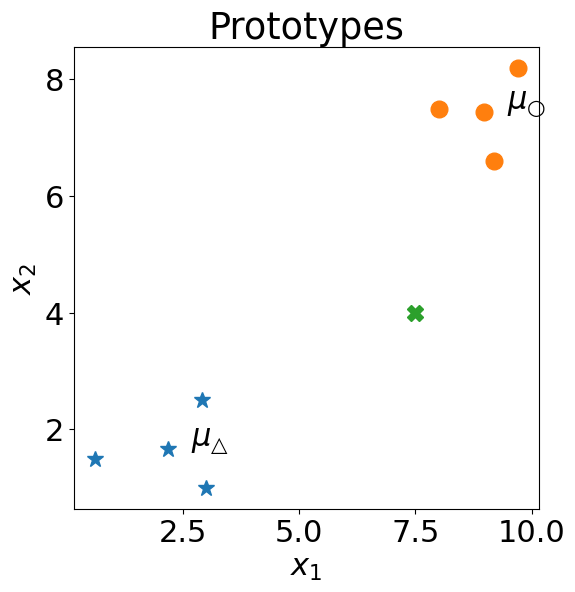

In [96]:
x = np.array([0.6, 2.9, 3])
x2 = np.array([8, 9.2, 9.7])
y = np.array([1.5, 2.5, 1])
y2 = np.array([7.5, 6.6, 8.2])
x3 = np.array([7.5])
y3 = np.array([4.0])

mu1x = x.mean()
mu1y = y.mean()

mu2x = x2.mean()
mu2y = y2.mean()

plt.figure(figsize=(7, 5.5))
fig, ax = plt.subplots()
ax.plot(x,y, '*', color='C0', markersize=12)
ax.plot(mu1x, mu1y, '*', color='C0', markersize=12)
ax.annotate('$\mu_{\\bigtriangleup}$', (mu1x+.5, mu1y+0.05))
ax.plot(x2, y2, 'o',color='C1', markersize=12)
ax.plot(mu2x, mu2y, 'o', color='C1', markersize=12)
ax.annotate('$\mu_{\\bigcirc}$', (mu2x+.5, mu2y+0.05))
ax.plot(x3, y3, 'X', color='C2', markersize=12)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Prototypes')
plt.savefig('../src/images/prototypes_2.eps')

In [99]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('*', 'o', 'x', '^', 'v')
    colors = ('C0', 'C1', 'C2', 'C3', 'C4')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    scale_x = (xx1.max() - xx1.min())/20.
    scale_y = (xx2.max() - xx2.min())/20.

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    s=120, 
                    label=cl)
                    #edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    #edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=200, 
                    label='test set')
    
    for idx, cl in enumerate(np.unique(y)):
        plt.plot(X[y == cl, 0].mean(),
                 X[y == cl, 1].mean(), 
                c='black',
                marker='o',
                markersize=12,
                label=f'$\mu_{cl}$')
        plt.text(X[y == cl, 0].mean() - scale_x,
                 X[y == cl, 1].mean() + scale_y,
                s='$\mu_{' + str(int(cl)) + '}$',
                )

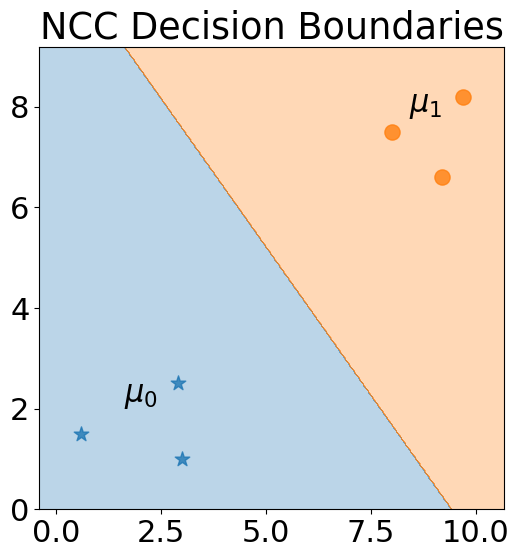

In [7]:
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid()
X = np.concatenate([x, x2])
Y = np.concatenate([y, y2])
X = np.c_[X, Y]
Y = [0,0,0,1,1,1]
clf.fit(X, Y)

plot_decision_regions(X, Y, clf)
plt.title("NCC Decision Boundaries")
plt.savefig('../src/images/NCC_DBs_0.svg', transparent=True)
plt.show()

In [101]:
a = 2.1
b = 1.2
c = 1
d = 3.2
e = 1e-4
x = np.random.rand(50, 1)
y = np.random.rand(50, 1)

z = y - a*np.sin(b*x + c) + d*x + e

In [102]:
clf = NearestCentroid()
clf.fit(np.c_[x, y], [0] * 25 + [1] * 25)

NearestCentroid()

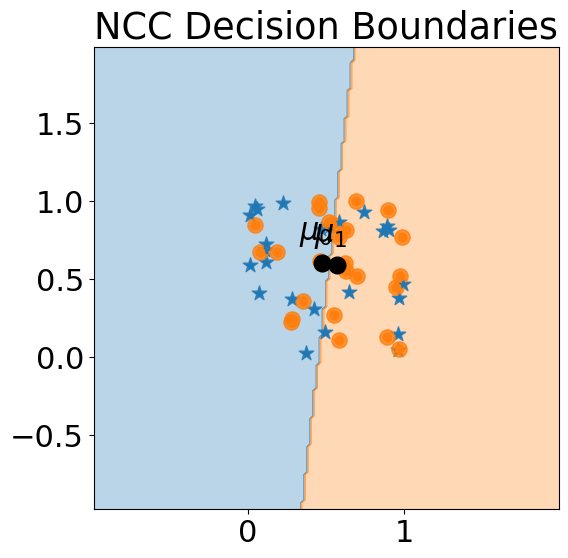

In [103]:
plt.plot(x[:25], y[:25], '*')
plt.plot(x[25:], y[25:], 'o')

plot_decision_regions(np.c_[x, y], [0] * 25 + [1] * 25, clf)
plt.title("NCC Decision Boundaries")
plt.savefig('../src/images/NCC_DBs_1.svg', transparent=True)
plt.show()

In [104]:
def calc_and_plot(x, y):
    idxs = np.arange(len(x))
    np.random.shuffle(idxs)
    x = x[idxs]
    y = y[idxs]

    fig = plt.figure(figsize=(6,3))
    ax = plt.axes()

    
    for cls in np.unique(y):
        ax.scatter(x[np.where(y==cls), 0], x[np.where(y==cls), 1], s=5, label=f'Class {cls}')

    return fig#, FuncAnimation(fig, animate, frames=means, blit=False, repeat=True)
    


In [105]:
import numpy as np

def calc_means(X, Y):
    classes = np.unique(Y)
    mu = np.zeros((X.shape[0] + 1, len(classes), X.shape[1]))
    N_k = np.zeros(len(classes))
    for idx, xi in enumerate(X):
        k = int(Y[idx])
        idmu = idx + 1
        mu[idmu, k, :] = N_k[k]/(N_k[k] + 1) * mu[idmu, k, :] + 1/(N_k[k] + 1) * xi
        if idx < (len(X) - 1):
            mu[idmu+1] = mu[idmu]
        N_k[k] += 1
    return mu


In [106]:
import numpy as np

def make_data_threeclass(N=90):
    mu = np.array([[0,3],[0,-3],[2,1]]).T
    C = np.array([[5.,4.],[4.,5.]])
    n_samples_per_class = int(N/3)
    X = np.hstack((
        mvn(mu[:,0],C,n_samples_per_class).T,
        mvn(mu[:,1],C,n_samples_per_class).T,
        mvn(mu[:,2],C,n_samples_per_class).T))
    labels = np.ones(n_samples_per_class, dtype=int)
    y = np.hstack((labels,2*labels,3*labels))-1
    # generates some toy data
    return X.T,y.T

def make_data_twoclass(N=100):
    # generates some toy data
    mu = np.array([[0,3],[0,-3]]).T
    n_samples_per_class = int(N/2)
    C = np.array([[5.,4.],[4.,5.]])
    X = np.hstack((
            mvn(mu[:,0],C,n_samples_per_class).T, 
            mvn(mu[:,1],C,n_samples_per_class).T
        ))
    y = np.hstack((np.zeros((n_samples_per_class)),(np.ones((n_samples_per_class)))))
    return X.T,y.T
    

def make_data_spherical(N=100):
    # generates some toy data
    mu = np.array([[0,3],[0,-3]]).T
    n_samples_per_class = int(N/2)
    C = np.eye(2)
    X = np.hstack((
        mvn(mu[:,0],C,n_samples_per_class).T, 
        mvn(mu[:,1],C,n_samples_per_class).T
    ))
    y = np.hstack((np.zeros((n_samples_per_class)),(np.ones((n_samples_per_class)))))
    return X.T,y.T

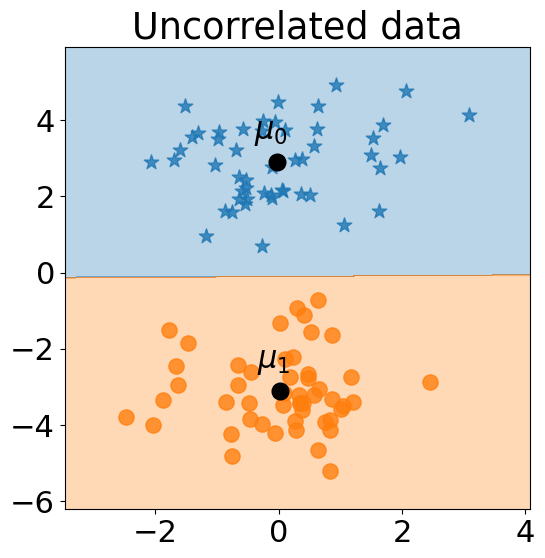

In [107]:
x, y = make_data_spherical()
clf = NearestCentroid()
clf.fit(x, y)
plot_decision_regions(x, y, clf)
plt.title("Uncorrelated data")
plt.savefig('../src/images/NCC_uncorrelated.svg', transparent=True)
plt.show()

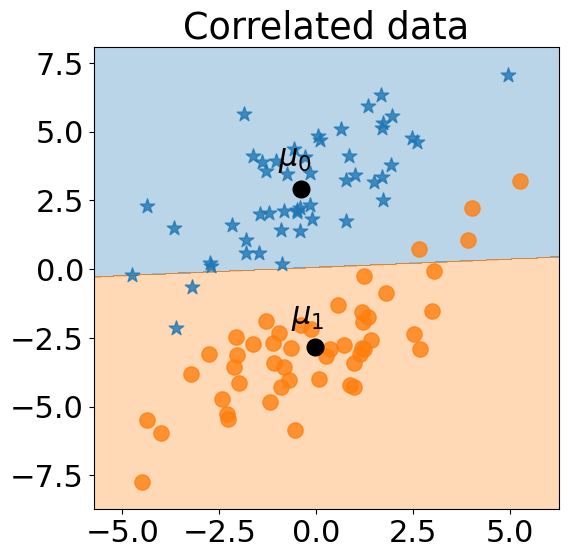

In [113]:
x, y = make_data_twoclass()
clf = NearestCentroid()
clf.fit(x, y)
plot_decision_regions(x, y, clf)
plt.title("Correlated data")
plt.savefig('../src/images/NCC_correlated.svg', transparent=True)
plt.show()

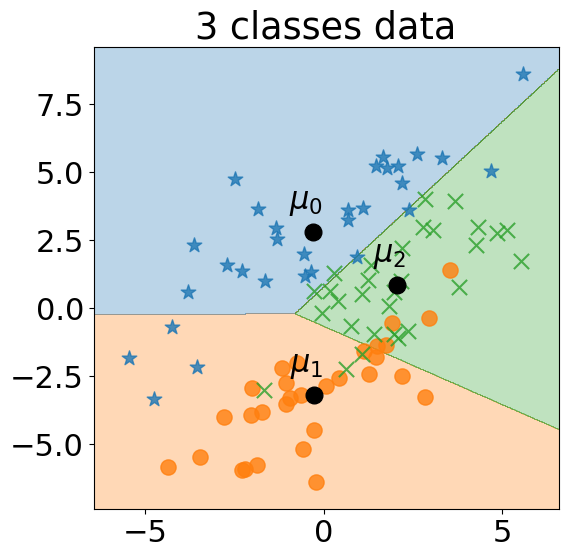

In [118]:
x, y = make_data_threeclass()
clf = NearestCentroid()
clf.fit(x, y)
plot_decision_regions(x, y, clf)
plt.title("3 classes data")
plt.savefig('../src/images/NCC_3_class.svg', transparent=True)
plt.show()

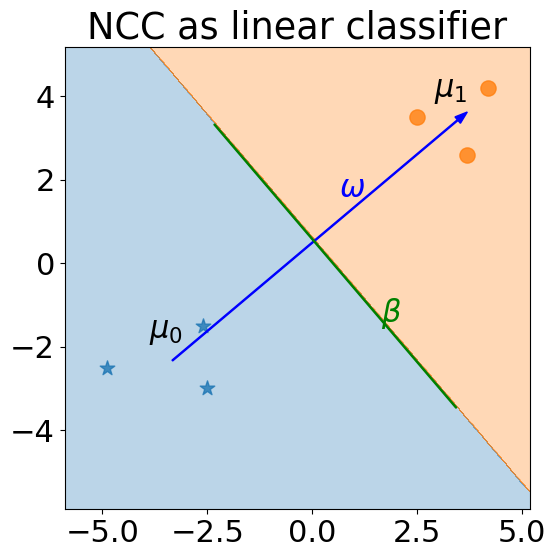

In [41]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('*', 'o', 'x', '^', 'v')
    colors = ('C0', 'C1', 'C2', 'C3', 'C4')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xmin = min([x1_min, x2_min])
    xmax = max([x1_max, x2_max])
    xx1, xx2 = np.meshgrid(np.arange(xmin, xmax, resolution),
                           np.arange(xmin, xmax, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    scale_x = (xx1.max() - xx1.min())/20.
    scale_y = (xx2.max() - xx2.min())/20.

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    s=120, 
                    label=cl)
                    #edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    #edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=200, 
                    label='test set')
    mus = []
    for idx, cl in enumerate(np.unique(y)):
        mus.append([X[y == cl, 0].mean(),
                 X[y == cl, 1].mean()])
        plt.text(X[y == cl, 0].mean() - scale_x,
                 X[y == cl, 1].mean() + scale_y,
                s='$\mu_{' + str(int(cl)) + '}$',
                )
    mus_x = list(map(lambda x: x[0], mus))
    mus_y = list(map(lambda x: x[1], mus))
    x_min, y_min, x_max, y_max = mus_x[0], mus_y[0], mus_x[1]-mus_x[0], mus_y[1]-mus_y[0]
    plt.arrow(x_min, y_min, x_max, y_max,width=0.025,head_width=0.2, color='blue')
    x_h = x_min + (x_max)/2
    y_h = y_min + (y_max)/2
    rad_90 = np.deg2rad(90)
    new_mus = (
        np.array([[x_min, y_min], [x_max, y_max]])
        @ np.array([[np.cos(rad_90), -np.sin(rad_90)], [np.sin(rad_90), np.cos(rad_90)]])
    )# @ (1.25 * np.eye(2))
    dir = (new_mus[0,:] - new_mus[1,:])/np.linalg.norm(new_mus[0,:] - new_mus[1,:])
    plt.arrow(new_mus[0][0], new_mus[0][1], new_mus[1][0], new_mus[1][1],width=0.025,head_width=0., color='green')
    return mus


x = np.array([0.6, 2.9, 3]) - 5.5
x2 = np.array([8, 9.2, 9.7]) - 5.5
y = np.array([1.5, 2.5, 1]) - 4
y2 = np.array([7.5, 6.6, 8.2]) - 4
x3 = np.array([7.5])
y3 = np.array([4.0])

mu1x = x.mean()
mu1y = y.mean()

mu2x = x2.mean()
mu2y = y2.mean()

clf = NearestCentroid()
X = np.concatenate([x, x2])
Y = np.concatenate([y, y2])
X = np.c_[X, Y]
Y = [0,0,0,1,1,1]
clf.fit(X, Y)

mus = plot_decision_regions(X, Y, clf)
mus_x = list(map(lambda x: x[0], mus))
mus_y = list(map(lambda x: x[1], mus))
#plt.arrow(mus_x[0], mus_y[0], mus_x[1], mus_y[1],width=0.025,head_width=0.2, color='blue')
plt.text(mus_x[1]+mus_x[0]+0.5, mus_y[1]+mus_y[0]+0.5, s='$\\omega$', color='blue')
plt.text(mus_x[1]+mus_x[0]+1.5, mus_y[1]+mus_y[0]-2.5, s='$\\beta$', color='green')
plt.title("NCC as linear classifier")
plt.savefig('../src/images/NCC_lin_classifier.svg', transparent=True)
plt.show()

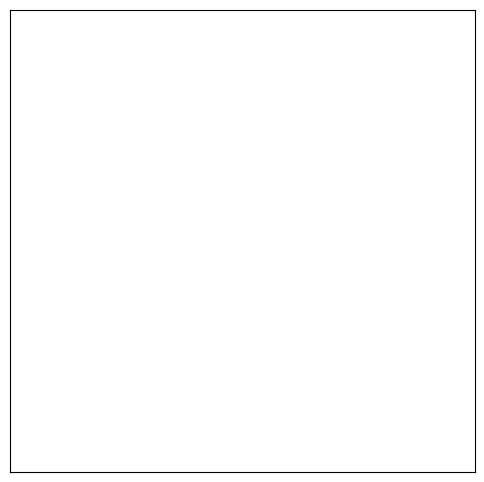

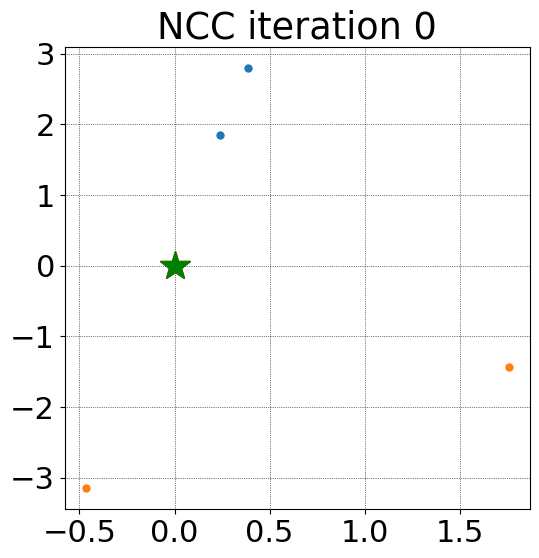

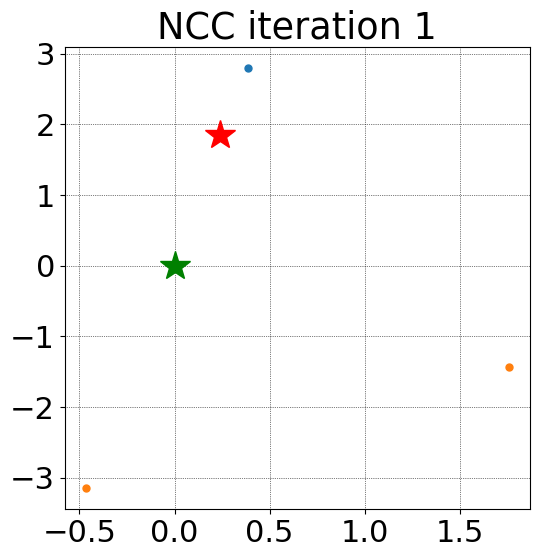

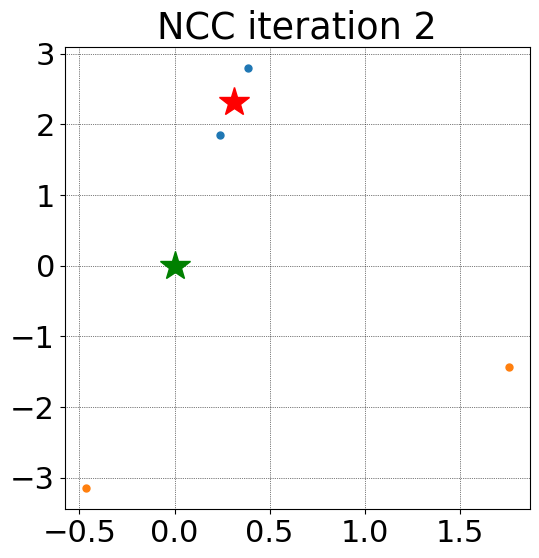

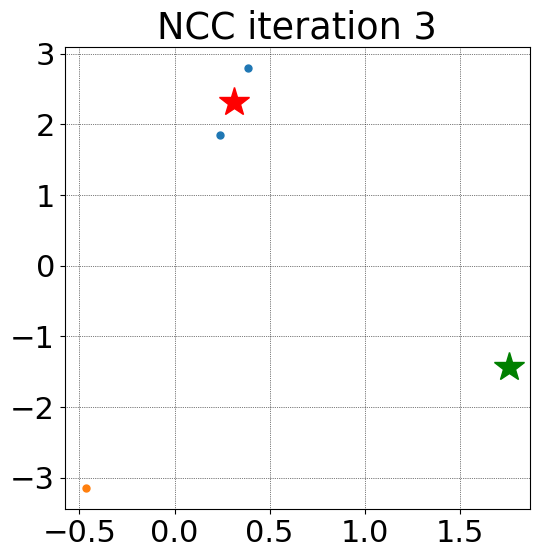

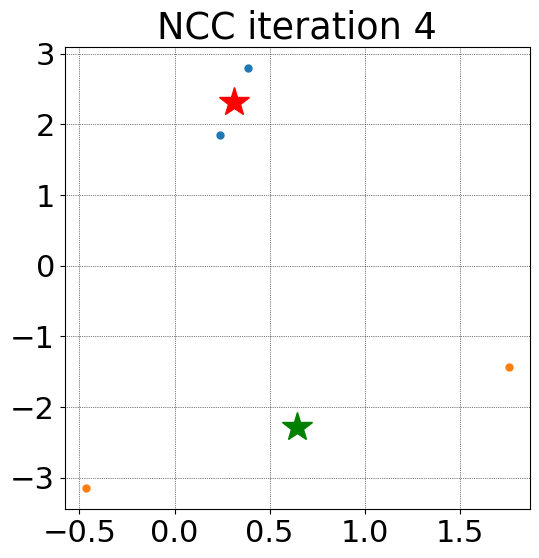

In [198]:
# lecture visualization

X, Y = make_data_spherical(4)
idxs = np.arange(len(X))

np.random.shuffle(idxs)
x = X[idxs]
y = X[idxs]
means = calc_means(X, Y)
plt.rc('grid', linestyle=':', color='black', linewidth=.5)


def animate(means_data):
    for idmean, mean in enumerate(means_data):
        plt.plot([mean[0]], [mean[1]], f'{["r", "g", "b"][idmean]}*', markersize=22, label='$\mu_{' + str(idmean) + '}$')


plt.tick_params(top=False, bottom=False, left=False, right=False,
            labelleft=False, labelbottom=False)
for idx, mean_vals in enumerate(means):
    fig = plt.figure(figsize=(6,6))
    ax = plt.axes()
    for cls in np.unique(Y):
        ax.scatter(X[np.where(Y==cls), 0], X[np.where(Y==cls), 1], s=25, label=f'Class {cls}')
    animate(mean_vals)
    plt.grid()
    plt.title(f'NCC iteration {idx}')
    
    plt.savefig(f'../src/images/NCC_frame_{idx}.svg')
    
    plt.show()